<a href="https://colab.research.google.com/github/sohamphanseiitb/coursework-iitb/blob/main/AE410_Assignment_2_Soham_Phanse_19D170030_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AE410 Navigation and Guidance
## Assignment 2
## Soham S. Phanse, 19D170030

### Q4 (A)


In [342]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
import scipy

At every step, we need to calculate $r$ and $\theta$, and then we can update their Cartesian positions as follows. 

- Since the target is unaccelerated, and has constant velocity, we can obtain the trajectory very easily as below:

$$ x_T(t+dt) = x_T(t) + V_Tcos\gamma_T$$
$$ y_T(t+dt) = y_T(t) + V_Tsin\gamma_T $$

Now, once we have the target's position and the values of $r$ and $\theta$ we can obtain the missile's position as follows:

We know, $r$ is the relative position of the missile with respect to the target

$$ \overrightarrow{r} = \overrightarrow{r_T} - \overrightarrow{r_M}$$

$$ \overrightarrow{r_M} = \overrightarrow{r_T} - \overrightarrow{r}$$

Hence

$$y_M = y_T - rsin\theta$$

$$x_M = x_T - rcos\theta$$

We already know how $r$ and $\theta$ vary,

$$\dot{r} = V_r = V_Tcos(\gamma_T - \theta) - V_M$$
$$\dot{\theta} = \frac{V_\theta}{r} = \frac{V_Tsin(\gamma_T - \theta)}{r}$$

In the end, we find $r$ and $\theta$ by using numerical integration. 

In [343]:
# define timespan for simulation, span = 10 seconds
tstart = 0
tend = 200
size = 10001
t = np.linspace(tstart, tend, size)

# define the time interval we will use for the computation
dt = t[1]-t[0]

# Decide initial position of missile
x_M0, y_M0 = 0, 0

# initial conditions ## in metres and theta
r_0, th_0 = 10000, np.sin(np.pi/6)

# Decide initial position of target
x_T0, y_T0 = r_0*np.cos(th_0), r_0*np.sin(th_0)

# create arrays
x_T, y_T = np.zeros(size), np.zeros(size)
x_M, y_M = np.zeros(size), np.zeros(size)

# define initial values of target
x_T[0], y_T[0] = x_T0, y_T0

# Define other constants given in the question
V_T, V_M, g_T, g_M = 100, 150, np.sin(2*np.pi/3), np.sin(np.pi/6)

# create arrays to store relative position and line of sight angle during the timespan
r, th = np.zeros(size), np.zeros(size)

r[0], th[0] = r_0, th_0

In [344]:
def distance(x_T, y_T, x_M, y_M):
  return np.sqrt((x_T - x_M)**2 + (y_T - y_M)**2)

In [346]:
# keep looping through till interception
# define counter 
c4 = 0

# set tolerance
TOL = 2

while distance(x_T[c4], y_T[c4], x_M[c4], y_M[c4])>TOL:

  # Update laws for target
  x_T[c4+1] = x_T[c4] + V_T*np.cos(g_T)*dt
  y_T[c4+1] = y_T[c4] + V_T*np.sin(g_T)*dt

  # Update relative distance and theta 

  r[c4+1] = r[c4] + (V_T*np.cos(g_T-th[c4]) - V_M)*dt
  th[c4+1] = th[c4] + ((V_T*np.sin(g_T-th[c4]))/r[c4])*dt

  # update laws for missile

  x_M[c4] = x_T[c4] - r[c4]*np.cos(th[c4])
  y_M[c4] = y_T[c4] - r[c4]*np.sin(th[c4])

  c4 = c4 + 1

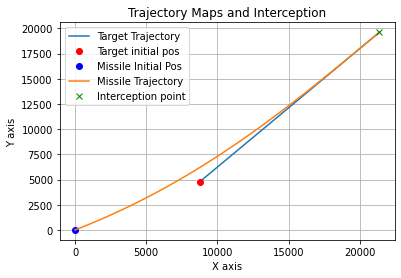

In [347]:
# trajectory maps and interception
plt.plot(x_T[:c4], y_T[:c4], label='Target Trajectory')
plt.plot(x_T0, y_T0, 'ro', label='Target initial pos')
plt.plot(x_M[0], y_M[0], 'bo', label='Missile Initial Pos')
plt.plot(x_M[:c4], y_M[:c4], label='Missile Trajectory')
plt.plot(x_M[c4], y_M[c4], 'gx', label="Interception point")
plt.grid(1)
plt.title("Trajectory Maps and Interception")
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

In [348]:
# guidance command plot

a_M = np.zeros(size)
a_M0 = V_M*V_T*np.sin(g_T-th_0)/r_0
a_M[0] = a_M0

for count in range(1, c4):
  a_M[count] = V_M*V_T*np.sin(g_T-th[count])/r[count]

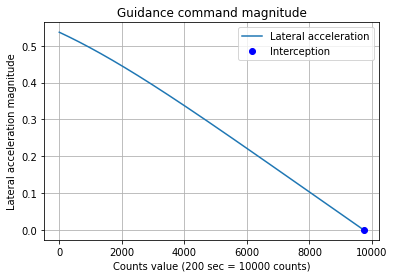

In [349]:
plt.plot(a_M[:c4], label="Lateral acceleration")
plt.title("Guidance command magnitude")
plt.grid()
plt.plot(c4, a_M[c4], 'bo', label="Interception")
plt.xlabel("Counts value (200 sec = 10000 counts)")
plt.ylabel("Lateral acceleration magnitude")
plt.legend()

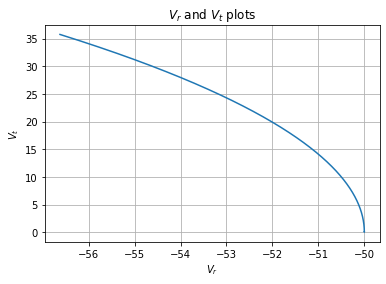

In [350]:
# we plot the V_theta and V_r plot
V_r = V_T*np.cos(g_T - th) - V_M
V_th = V_T*np.sin(g_T - th)

plt.plot(V_r, V_th)
plt.grid(1)
plt.title("$V_r$ and $V_t$ plots")
plt.xlabel("$V_r$")
plt.ylabel("$V_t$");

Q4 (B)
If the missile speed reduces to $V_M$ = 75. Interception is not possible. Reasons can be found in the update law for the relative distance:
 
$$ r[t+dt] = r[t] + (V_T*cos(\gamma_T-\theta(t)) - V_M)*dt $$

Here, the additive term can be positive, for some values of $\theta$, leading to a higher value as compared to the current iterate. That is we obtain a positive rate of change in relative distance, $\dot{r} > 0$. Earlier it wasn't possible, since $V_M$ = 150, the additive term was always negative, hence it was ensured that interception will happen, because $\dot{r} < 0$. 

We can quantify the reasoning by checking out how $r$ varies. 

We have the plots and codes below:



In [351]:
# define timespan for simulation, span = 10 seconds
tstart = 0
tend = 100
size = 1001
t = np.linspace(tstart, tend, size)

# define the time interval we will use for the computation
dt = t[1]-t[0]

# Decide initial position of missile
x_M0, y_M0 = 0, 0

# initial conditions ## in metres and theta
r_0, th_0 = 10000, np.sin(np.pi/6)

# Decide initial position of target
x_T0, y_T0 = r_0*np.cos(th_0), r_0*np.sin(th_0)

# create arrays
x_T, y_T = np.zeros(size), np.zeros(size)
x_M, y_M = np.zeros(size), np.zeros(size)

# define initial values of target
x_T[0], y_T[0] = x_T0, y_T0

# Define other constants given in the question
V_T, V_M, g_T, g_M = 100, 75, np.sin(2*np.pi/3), np.sin(np.pi/6)

# create arrays to store relative position and line of sight angle during the timespan
r, th = np.zeros(size), np.zeros(size)

r[0], th[0] = r_0, th_0

In [352]:
# keep looping through till interception
# define counter 
c4 = 0

# set tolerance
TOL = 8000

while c4<(size-1):#distance(x_T[c4], y_T[c4], x_M[c4], y_M[c4])>TOL:

  # Update laws for target
  x_T[c4+1] = x_T[c4] + V_T*np.cos(g_T)*dt
  y_T[c4+1] = y_T[c4] + V_T*np.sin(g_T)*dt

  # Update relative distance and theta 

  r[c4+1] = r[c4] + (V_T*np.cos(g_T-th[c4]) - V_M)*dt
  th[c4+1] = th[c4] + ((V_T*np.sin(g_T-th[c4]))/r[c4])*dt

  # update laws for missile

  x_M[c4] = x_T[c4] - r[c4]*np.cos(th[c4])
  y_M[c4] = y_T[c4] - r[c4]*np.sin(th[c4])

  c4 = c4 + 1

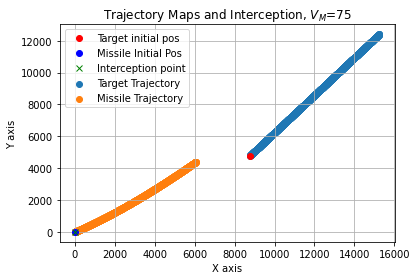

In [353]:
# trajectory maps and interception
plt.scatter(x_T[:c4], y_T[:c4], label='Target Trajectory')
plt.plot(x_T0, y_T0, 'ro', label='Target initial pos')
plt.plot(x_M[0], y_M[0], 'bo', label='Missile Initial Pos')
plt.scatter(x_M[:c4], y_M[:c4], label='Missile Trajectory')
plt.plot(x_M[c4], y_M[c4], 'gx', label="Interception point")
plt.grid(1)
plt.title("Trajectory Maps and Interception, $V_M$=75")
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

Text(0.5, 1.0, 'Relative distance between missile and target')

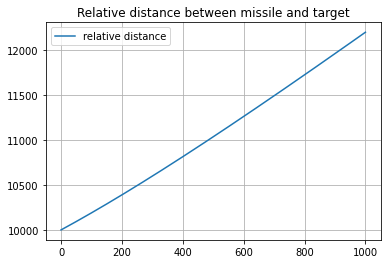

In [354]:
# plotting relative distance
plt.plot(list(range(c4+1)), r, label="relative distance")
plt.grid(1)
plt.legend()
plt.title("Relative distance between missile and target")

As this is always positive, we can conclude that interception doesn't happen. 

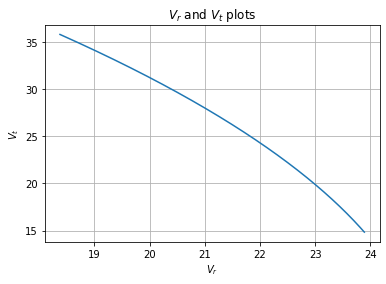

In [355]:
# we plot the V_theta and V_r plot
V_r = V_T*np.cos(g_T - th) - V_M
V_th = V_T*np.sin(g_T - th)

plt.plot(V_r, V_th)
plt.grid(1)
plt.title("$V_r$ and $V_t$ plots")
plt.xlabel("$V_r$")
plt.ylabel("$V_t$");

Q4 (c) Deviated Guidance

In [356]:
# define timespan for simulation, span = 10 seconds
tstart = 0
tend = 200
size = 10001
t = np.linspace(tstart, tend, size)

# define the time interval we will use for the computation
dt = t[1]-t[0]

# Decide initial position of missile
x_M0, y_M0 = 0, 0

# initial conditions ## in metres and theta
r_0, th_0 = 10000, np.sin(np.pi/6)

# Decide initial position of target
x_T0, y_T0 = r_0*np.cos(th_0), r_0*np.sin(th_0)

# create arrays
x_T, y_T = np.zeros(size), np.zeros(size)
x_M, y_M = np.zeros(size), np.zeros(size)

# define initial values of target
x_T[0], y_T[0] = x_T0, y_T0

# Define other constants given in the question
V_T, V_M, g_T, g_M = 100, 150, np.sin(2*np.pi/3), np.sin(np.pi/6)

# create arrays to store relative position and line of sight angle during the timespan
r, th = np.zeros(size), np.zeros(size)

r[0], th[0] = r_0, th_0

Now, we need to make some updates in the guidance laws, which are as follows:

$$\dot{r} = V_r = V_Tcos(\gamma_T − \theta) − V_Mcos\delta$$

$$r\dot{θ} = V_\theta = V_Tsin(\gamma/_T − \theta) - V_Msin\delta$$

If here, $\delta$ = 0, we revert back to the pure guidance laws. The code reflects this change

In [377]:
def deviation(delta):

  # keep looping through till interception
  # define counter  
  c4 = 0

  # set tolerance
  TOL = 5

  while distance(x_T[c4], y_T[c4], x_M[c4], y_M[c4])>TOL:

    # Update laws for target
    x_T[c4+1] = x_T[c4] + V_T*np.cos(g_T)*dt
    y_T[c4+1] = y_T[c4] + V_T*np.sin(g_T)*dt

    # Update relative distance and theta 

    r[c4+1] = r[c4] + (V_T*np.cos(g_T-th[c4]) - V_M*np.cos(delta))*dt
    th[c4+1] = th[c4] + ((V_T*np.sin(g_T-th[c4]) - V_M*np.sin(delta))/r[c4])*dt

    # update laws for missile

    x_M[c4] = x_T[c4] - r[c4]*np.cos(th[c4])
    y_M[c4] = y_T[c4] - r[c4]*np.sin(th[c4])

    c4 = c4 + 1

  # trajectory maps and interception
  plt.plot(x_T[:c4], y_T[:c4], label='Target Trajectory')
  plt.plot(x_T0, y_T0, 'ro', label='Target initial pos')
  plt.plot(x_M[0], y_M[0], 'bo', label='Missile Initial Pos')
  plt.plot(x_M[:c4], y_M[:c4], label='Missile Trajectory')
  plt.plot(x_M[c4], y_M[c4], 'gx', label="Interception point")
  plt.grid(1)
  plt.title("Trajectory Maps and Interception Delta = %.2f degree"%(delta*180/np.pi))
  plt.xlabel('X axis')
  plt.ylabel('Y axis')
  plt.legend()

  # guidance command plot
  a_M = np.zeros(size)
  a_M0 = V_M*(th[1]-th[0])/dt
  a_M[0] = a_M0
  for count in range(1, c4):
    a_M[count] = V_M*(th[count]-th[count-1])/dt

  plt.figure()
  plt.plot(a_M[:c4], label="Lateral acceleration")
  plt.title("Guidance command magnitude Delta = %.2f degree"%(delta*180/np.pi))
  plt.grid()
  plt.plot(c4, a_M[c4-1], 'bo', label="Interception")
  plt.xlabel("Counts value (200 sec = 10000 counts)")
  plt.ylabel("Lateral acceleration magnitude")
  plt.legend()

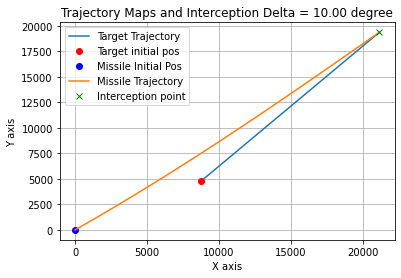

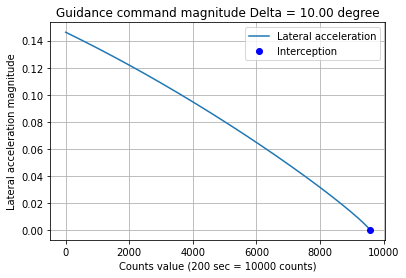

In [378]:
# delta = 10
deviation(np.pi/18)

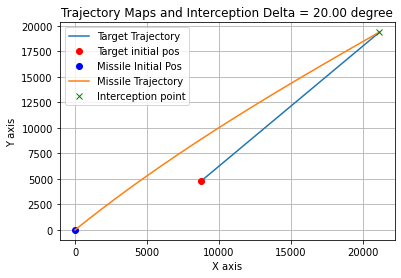

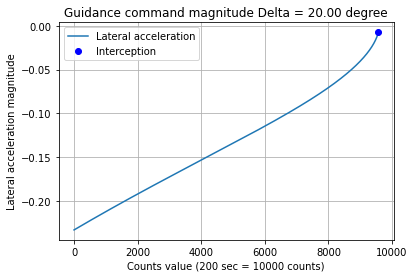

In [379]:
# delta = 20
deviation(np.pi/9)

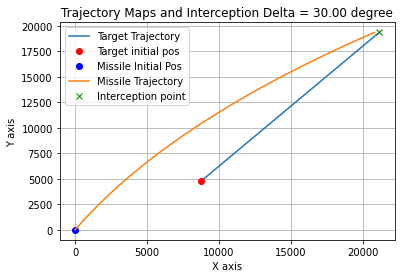

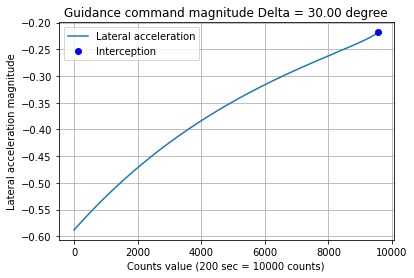

In [380]:
# delta = 30
deviation(np.pi/6)

Q4(d)

Suppose the missile is not in pure pursuit course from beginning but has an initial deviation of 30◦ anticlockwise in its velocity direction. How will you implement pursuit guidance law? Generate plots of trajectories and guidance commands accordingly.


Here the question seems a bit ambigous. Hence we assume that 'by stating, "how will you implement pursuit guidance law", we assume that it means that we should be implementing 'pure guidance law'.

**So we need to devise and implement a guidance law, which will incrementally adjust the deviation to pure pursuit.**

We propose the following expression to adjust the 'extra' deviation and bring it back to pure pursuit, which is as follows:

$$ \delta(r) = \frac{r}{r_0}(\frac{\gamma_T - \theta}{3}) $$

To verify its applicability, we see, when r = r_0, $\delta = 30$, and when r=0, when $\delta = 0$, which gives pure pursuit.

Hence the new guidance laws will be as follows:

$$\dot{r} = V_Tcos(\gamma_T-\theta) - V_Mcos(\gamma_M-\theta)$$

We have, $\gamma_M - \theta$ = $\delta$, hence substituting the above expression, 

$$\dot{r} = V_Tcos(\gamma_T-\theta) - V_Mcos(\frac{r}{r_0}(\frac{\gamma_T - \theta}{3}))$$

Similarly we have, 

$$r\dot{\theta} = V_Tsin(\gamma_T − \theta) − V_Msin(\delta)$$

$$r\dot{\theta} = V_Tsin(\gamma_T − \theta) − V_Msin(\frac{r}{r_0}(\frac{\gamma_T - \theta}{3}))$$

$$\dot{\theta} = \frac{V_Tsin(\gamma_T − \theta) − V_Msin(\frac{r}{r_0}(\frac{\gamma_T - \theta}{3}))}{r} $$

The guidance law can be implemented as, 

$$a_M = V_M\dot{\theta}$$

The main inspiration was taken from this paper: http://dx.doi.org/10.2514/1.G000573

We present the code (reused from above sections)

In [391]:
# define timespan for simulation, span = 10 seconds
tstart = 0
tend = 200
size = 10001
t = np.linspace(tstart, tend, size)

# define the time interval we will use for the computation
dt = t[1]-t[0]

# Decide initial position of missile
x_M0, y_M0 = 0, 0

# initial conditions ## in metres and theta
r_0, th_0 = 10000, np.sin(np.pi/6)

# Decide initial position of target
x_T0, y_T0 = r_0*np.cos(th_0), r_0*np.sin(th_0)

# create arrays
x_T, y_T = np.zeros(size), np.zeros(size)
x_M, y_M = np.zeros(size), np.zeros(size)

# define initial values of target
x_T[0], y_T[0] = x_T0, y_T0

# Define other constants given in the question
V_T, V_M, g_T, g_M = 100, 150, np.sin(2*np.pi/3), np.sin(np.pi/3)

# create arrays to store relative position and line of sight angle during the timespan
r, th = np.zeros(size), np.zeros(size)

r[0], th[0] = r_0, th_0

In [398]:
# keep looping through till interception
# define counter 
c4 = 0

# set tolerance
TOL = 5

while distance(x_T[c4], y_T[c4], x_M[c4], y_M[c4])>TOL:

  # Update laws for target
  x_T[c4+1] = x_T[c4] + V_T*np.cos(g_T)*dt
  y_T[c4+1] = y_T[c4] + V_T*np.sin(g_T)*dt

  # Update relative distance and theta 

  r[c4+1] = r[c4] + (V_T*np.cos(g_T-th[c4]) - V_M*np.cos(r[c4]*(g_T-th[c4])/(3*r_0)))*dt
  th[c4+1] = th[c4] + ((V_T*np.sin(g_T-th[c4]) - V_M*np.sin(r[c4]*(g_T-th[c4])/(3*r_0)))/r[c4])*dt

  # update laws for missile

  x_M[c4] = x_T[c4] - r[c4]*np.cos(th[c4])
  y_M[c4] = y_T[c4] - r[c4]*np.sin(th[c4])

  c4 = c4 + 1

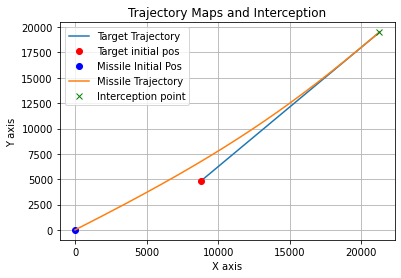

In [399]:
# trajectory maps and interception
plt.plot(x_T[:c4], y_T[:c4], label='Target Trajectory')
plt.plot(x_T0, y_T0, 'ro', label='Target initial pos')
plt.plot(x_M[0], y_M[0], 'bo', label='Missile Initial Pos')
plt.plot(x_M[:c4], y_M[:c4], label='Missile Trajectory')
plt.plot(x_M[c4], y_M[c4], 'gx', label="Interception point")
plt.grid(1)
plt.title("Trajectory Maps and Interception")
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

Text(0, 0.5, 'Deviation angle (in radians)')

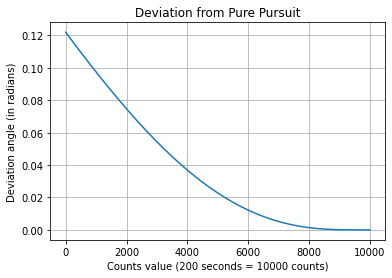

In [401]:
# plot deviation
plt.plot(r*(g_T-th)/(3*r_0))
plt.title("Deviation from Pure Pursuit")
plt.grid()
plt.xlabel("Counts value (200 seconds = 10000 counts)")
plt.ylabel("Deviation angle (in radians)")

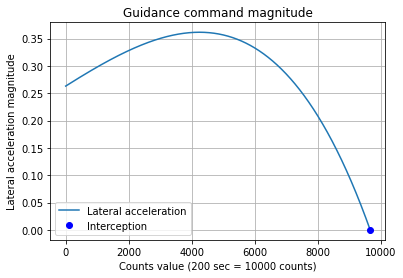

In [402]:
# guidance command plot

a_M = np.zeros(size)
a_M0 = V_M*(th[1]-th[0])/dt
a_M[0] = a_M0

for count in range(1, c4):
  a_M[count] = V_M*(th[count]-th[count-1])/dt

plt.plot(a_M[:c4], label="Lateral acceleration")
plt.title("Guidance command magnitude")
plt.grid()
plt.plot(c4, a_M[c4], 'bo', label="Interception")
plt.xlabel("Counts value (200 sec = 10000 counts)")
plt.ylabel("Lateral acceleration magnitude")
plt.legend()